> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# V: K-means clustering

<div style="text-align: right"> **Due date: Nov. 16, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[2015142113] [JunYoung Kim]</span> </h2>

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-11-16 11:14:28.164841


## Problem description

In this homework, we will implement a k-means clustering algorihms, one of unsueprvised learning approaches. The unlabeled dataset ($\texttt{kmeans.csv}$) contains two features ($\texttt{x1}$ and $\texttt{x2}$), and you can visualize the distributions of data as follows.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# input data
df = pd.read_csv('kmeans.csv')
df.head()

,x1,x2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
df.mean()

x1    40.611358
x2    22.862141
dtype: float64

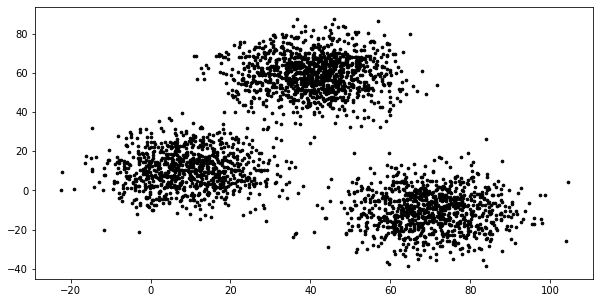

In [5]:
# plot
x1 = df['x1'].values
x2 = df['x2'].values
plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(x1, x2, c='k', s = 7) 

### P1.1

(*40 points*) Implement a k-means clustering method. It inputs the features and the number of clusters $k$, and outputs cluster labels and centers. Initialize cluster centers randomly and use the Euclidean distance.  
You should save 'previous cluster centers' by using an inner function copy().
> Convergence condition : when (previous_cluster_centers) = (current_cluster_centers)

In [6]:
a = np.array([1,2,3])
b = a
a[2] = 1
print(b)

[1 2 1]


In [7]:
a = np.array([1,2,3])
b = a.copy()
a[2] = 1
print(b)

[1 2 3]


In [8]:
from P05 import kmeans  

In [9]:
k = 15

In [10]:
model = kmeans(x1, x2, k)

In [11]:
X, cluster_labels, C = model.clustering()

- Predict labels of several samples

In [12]:
print(cluster_labels[20])
print(cluster_labels[100])
print(cluster_labels[200])
print(cluster_labels[1000])
print(cluster_labels[2000])

9
6
4
3
11


### P1.2
(*40 points*) Visualize cluster labels and centers for different $k$ values where $k = 2,3,6,10$.   
Compute cluster heterogeneities for each $k$, and find the best one. 
- size of star : 700


In [13]:
from P05 import plot_data  

- When k=2

In [14]:
k =2 
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

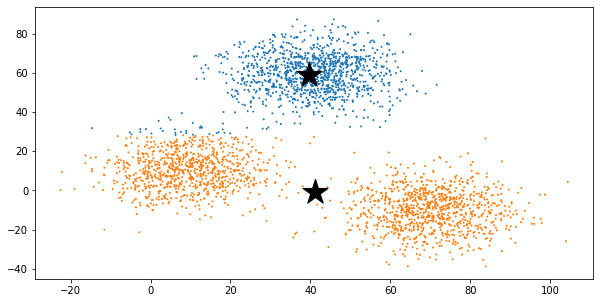

In [15]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=2

In [16]:
print(model.cluster_heterogeneity())

2491124.077689797


- When k=3

In [17]:
k = 3
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

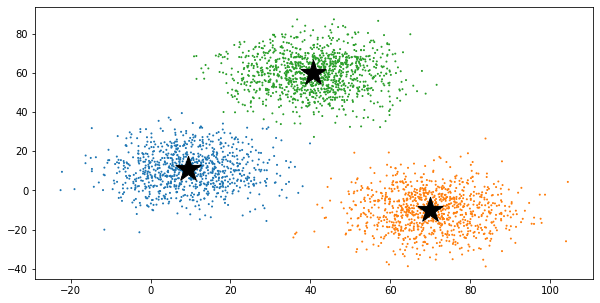

In [18]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=3

In [19]:
print(model.cluster_heterogeneity())

611605.880693395


- When k=6

In [20]:
k = 6
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

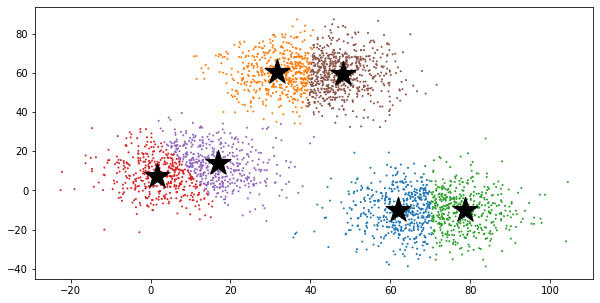

In [21]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=6

In [22]:
print(model.cluster_heterogeneity())

407726.7783443966


- When k=10

In [23]:
k = 10
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

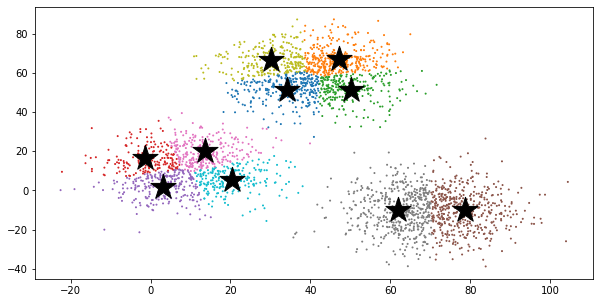

In [24]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=10

In [25]:
print(model.cluster_heterogeneity())

282260.8908868923


- choose best one among 𝑘=2,3,6,10.   

Best one is k = 3

## Result Analysis and Discussion (20 points)    
For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Unsupervised learning & supervised learning
    - Is k-means unsupervised learning or supervised learning?
    - Is k-NN unsupervised learning or supervised learning?
- Algorithm of k-means

### Unsupervised learning & Supervised learning
 k-mean Clustering은 Unsupervised learning의 한 종류이다. 이 방법은, 실제 sample들의 Ground truth label값을 알지 못해도, 각 sample data들을 좌표 상 근접한 sample들끼리 묶어 k개의 Cluster들을 만들어 내는 방법이다. Ground truth를 모르기 때문에 몇 개의 Cluster로 나누는게 맞는지, 그 Cluster속 sample들이 실제로도 같은 label에 속하는 지 알지 못하지만, k에 대해 각각 heterogeneity를 구해보면서 가장 적절한 k로 Clustering을 하도록 한다. 이처럼 k-mean은 분류하려는 대상에 대한 truth 정보가 없이 단지 분류만 하도록 하는 것이므로 Unsupervised learning이라고 할 수 있다.
 
 k-NN은 Supervised learning의 한 종류이다. regression처럼 sample들을 설명하는 하나의 Model을 만들어 내지는 않지만, 실제 sample들의 ground truth값들이 있어야하고, test set의 query들을 k개의 인접한 sample들의 ground truth값의 평균으로 prediction값을 배정하는 방법이기 때문이다. 즉, 실제 대상에 대한 정보를 가지고 training sample들로 학습을 시키기 때문에 Supervised learning이라고 할 수 있다.

### Algorithm of k-means

 우선 임의로 k개의 Cluster들의 중심 좌표들을 설정한다. 그 후, 모든 sample들을 k개의 중심 좌표들과 Eucliean Distance를 비교하여, 가장 가까운 좌표의 Cluster로 labeling한다. labeling을 하면서, 후에 중심 좌표들을 Update시키기 위해 다음 Cluster의 중심 좌표들을 위한 임의의 zeros matrix를 만들고, labeling한 sample의 좌표를 그 label의 중심 좌표에 해당하는 matrix 성분에 더하고 , 그 Cluster에 속하는 sample수를 동시에 count한다. labeling이 끝나면, 각 Cluster에 속하는 sample들의 수와 그 sample들의 좌표들의 합도 같이 구해지므로, 각 Cluster속 sample들 좌표들의 합을 sample 수로 나눠 Update할 중심 좌표들을 구한다. 이 좌표가 이전 좌표와 같다면, Loop를 중단하고, 각 Sample들의 label과 k개의 Cluster의 중심 좌표값을 최종 결과로 구하게 된다.